In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions

from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
X, y = load_iris(return_X_y=True)

In [3]:
sc = StandardScaler()
X = sc.fit_transform(X)

In [4]:
X, y = X[:100, [0, 2]], y[:100]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)

# Implementation

In [5]:
class LinearSVM:
    
    def __init__(self, eta=0.001, lambda_=0, n_iters=10):
        self.eta = eta
        self.lambda_ = lambda_
        self.n_iters = n_iters
        self.w = None
        self.b = None
    
    def fit(self, X, y):
        n_samples, n_features = X.shape
        # convert labels
        y = np.where(y <= 0, -1, 1)
        # initialize weights
        self.w = np.random.sample(n_features)
        self.b = np.random.sample()
        cost_ = []
        for i in range(self.n_iters):
            epoch_cost = []
            for x, y_true in zip(X, y):
                z = 1 - y_true * (np.dot(x, self.w) + self.b)
                dlambda = 2 * self.lambda_ * self.w
                if z >= 1:
                    self.w -= self.eta * dlambda
                    # db = 0 so do not update b
                else:
                    self.w -= self.eta * (dlambda - y_true * x)
                    self.b -= self.eta * y_true
                epoch_cost.append(self.__cost_function(z))
            cost_.append(np.mean(epoch_cost))
        return cost_
                
    
    def predict(self, X):
        return np.where(np.dot(X, self.w) + self.b <= 0, 0, 1)
    
    def __cost_function(self, z):
        return self.lambda_ * np.sum(self.w ** 2) + np.maximum(0, z)
    
    def __vector_length_sqr(self):
        folded = map(lambda x: x ** 2, self.w)

# Train model

In [6]:
epochs = 50
svm = LinearSVM(eta=0.001, lambda_=10, n_iters=epochs)
cost = svm.fit(X_train, y_train)

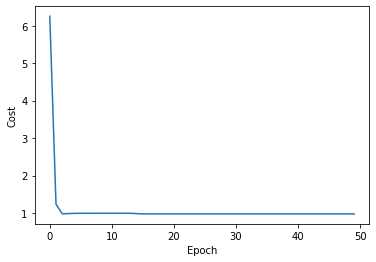

In [7]:
plt.plot(np.arange(0, epochs), cost)
plt.xlabel('Epoch')
plt.ylabel('Cost')
plt.show()

# Visualize results

In [8]:
y_pred = svm.predict(X_test)
print(f'Accuracy on test set: {accuracy_score(y_test, y_pred)}')

Accuracy on test set: 1.0


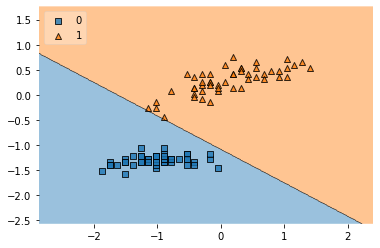

In [9]:
plot_decision_regions(X, y, clf=svm, legend=2)
plt.show()